### 头像真实与否案例

#### 构造数据

In [ ]:
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
print(y)
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY'),
                  '真实用户':y})
X

#### 数据处理

In [ ]:
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

#### 拆分数据

In [ ]:
y = X['真实用户']
X = X.iloc[:,:3]
display(X,y)

#### 可视化决策树（方法一）

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # 分类
from sklearn import tree

# 使用信息熵，作为分裂标准
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

plt.rcParams['font.family'] = 'STKaiti'
plt.figure(figsize=(12,16))

# 图形绘制
fn = X.columns # 列名
_ = tree.plot_tree(model,
                   filled = True,# 着色
                   feature_names=fn) # 属性二叉树裂分
plt.savefig('./tree1.jpg')

#### 可视化决策树（方法二）

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz # pip install graphviz
from sklearn import tree

#建模
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

# 绘图
dot_data = tree.export_graphviz(model, 
                            out_file=None, 
                            feature_names = X.columns,# 特征名
                            class_names = np.unique(y),# 类别名
                            filled=True, # 填充颜色
                            rounded=True) # 圆角

graph = graphviz.Source(dot_data)
# graph.render('tree2',format='png')
graph

#### 中文字体乱码修正

In [ ]:
import re
# 打开 dot_data.dot，修改 fontname="支持的中文字体"
f = open('tree2', 'r', encoding='utf-8')
text = f.read()
f.close()

with open('./tree3', 'w', encoding="utf-8") as file:
    file.write(re.sub(r'fontname="helvetica"', 'fontname="STKaiti"', text))

# 从文件中加载，展示
graph = graphviz.Source.from_file('./tree3')
graph.render('new_tree1')

In [ ]:
import re
# 打开 dot_data.dot，修改 fontname="支持的中文字体"
f = open('tree2', 'r', encoding='utf-8')
text = f.read()
f.close()

with open('./tree3', 'w', encoding="utf-8") as file:
    file.write(re.sub(r'fontname="helvetica"', 'fontname="Fangsong"', text))

# 从文件中加载，展示
graph = graphviz.Source.from_file('./tree3')
graph.render('new_tree2')

#### 字体查看

In [ ]:
from matplotlib import font_manager
fm = font_manager.FontManager()
[font.name for font in fm.ttflist]

### 信息熵手动计算【复现决策树】

#### 账号数据

In [ ]:
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY'),
                  '真实用户':y})
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

#### 建模查看树结构

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import graphviz # pip install graphviz
from sklearn import tree

#建模
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X.iloc[:,:3],y)

# 绘图
dot_data = tree.export_graphviz(model, 
                            out_file=None, 
                            feature_names = X.iloc[:,:3].columns,# 特征名
                            class_names = np.unique(y),# 类别名
                            filled=True, # 填充颜色
                            rounded=True) # 圆角

graph = graphviz.Source(dot_data)
graph

In [ ]:
0.4 * 0.811 + 0.6 * 0

#### 无条件信息熵

In [ ]:
0.3 * np.log2(1/0.3) + 0.7 * np.log2(1/0.7)

y = X['真实用户']
p = y.value_counts()/y.size

raw_entropy = round((p * np.log2(1/p)).sum(),3)
print('无条件信息熵：',raw_entropy)

#### 日志密度划分条件信息熵

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
x = X['日志密度'].unique()
x.sort()
print(x)
for i in range(len(x) - 1):
    split = x[i:i+2].mean()
    cond = X['日志密度'] <= split # 左右两边
    # 左右两边的概率分布
    p = cond.value_counts()/cond.size
    # 按照条件划分，两边的概率再次进行计算
    indexs = p.index # True 、 False
    entropy = 0 # 条件信息熵
    for index in indexs: # 分别获取左边和右边，分别计算左边的信息熵，右边的信息熵
        user = X[cond == index]['真实用户'] # 获取左右的数据
#         print('user：\n',user)
        p_user = user.value_counts()/user.size
        entropy += ((p_user * np.log2(1/p_user)).round(3)).sum() * p[index]
    print('分裂条件：',split,'信息熵：',entropy,'信息增益：',raw_entropy - entropy)

#### 按照好友密度划分信息熵

In [ ]:
x = X['好友密度'].unique()
x.sort()
print(x)
for i in range(len(x) - 1):
    split = x[i:i+2].mean()
    cond = X['好友密度'] <= split # 左右两边
    # 左右两边的概率分布
    p = cond.value_counts()/cond.size
    
    # 按照条件划分，两边的概率再次进行计算
    indexs = p.index # True 、 False
    entropy = 0 # 条件信息熵
    for index in indexs: # 分别获取左边和右边，分别计算左边的信息熵，右边的信息熵
        user = X[cond == index]['真实用户'] # 获取左右的数据
#         print('user：\n',user)
        p_user = user.value_counts()/user.size
        entropy += round(((p_user * np.log2(1/p_user)).round(3)).sum() * p[index],4)
    print('分裂条件：',split,'信息熵：',entropy,'信息增益：',raw_entropy - entropy)

####  筛选最佳划分条件

In [ ]:
columns = ['日志密度','好友密度','真实头像']
lower_entropy = 1
condition = {}
for col in columns:
    x = X[col].unique()
    x.sort()
    # 如何划分呢，分成两部分
    for i in range(len(x) - 1):
        split = x[i:i+2].mean()
        cond = X[col] <= split
        # 概率分布
        p = cond.value_counts()/cond.size
        # 按照条件划分，两边的概率分布情况
        indexs =p.index
        entropy = 0
        for index in indexs:
            user = X[cond == index]['真实用户']
            p_user = user.value_counts()/user.size
            entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
        print('分裂条件：',col,split,'信息熵：',entropy,'信息增益：',raw_entropy - entropy)
        if entropy < lower_entropy:
            condition.clear()
            lower_entropy = entropy
            condition[col] = split
print('最佳列分条件是：',condition)

#### 继续裂分

In [ ]:
cond = X['好友密度'] < 0.5
X_ = X[cond]
columns = ['日志密度','真实头像']
lower_entropy = 1
condition = {}
for col in columns:
    x = X_[col].unique()
    x.sort()
    # 如何划分呢，分成两部分
    for i in range(len(x) - 1):
        split = x[i:i+2].mean()
        cond = X_[col] <= split
        # 概率分布
        p = cond.value_counts()/cond.size
        # 按照条件划分，两边的概率分布情况
        indexs =p.index
        entropy = 0
        for index in indexs:
            user = X_[cond == index]['真实用户']
            p_user = user.value_counts()/user.size
            entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
        print('分裂条件：',col,split,'信息熵：',entropy*0.4,'信息增益：',0.3244 - entropy * 0.4)
        if entropy < lower_entropy:
            condition.clear()
            lower_entropy = entropy
            condition[col] = split
print('最佳列分条件是：',condition)

### 决策树分裂指标

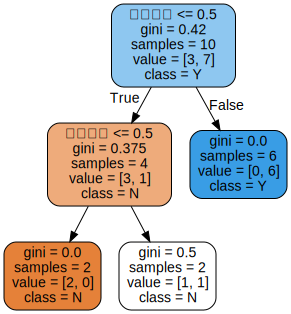

In [2]:
from sklearn.tree import DecisionTreeClassifier
import graphviz # pip install graphviz
from sklearn import tree
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY'),
                  '真实用户':y})
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
#建模
model = DecisionTreeClassifier(criterion='gini')
model.fit(X.iloc[:,:3],y)

# 绘图
dot_data = tree.export_graphviz(model, 
                            out_file=None, 
                            feature_names = X.iloc[:,:3].columns,# 特征名
                            class_names = np.unique(y),# 类别名
                            filled=True, # 填充颜色
                            rounded=True) # 圆角

graph = graphviz.Source(dot_data)
graph

In [5]:
p = X['真实用户'].value_counts()/10

round((p * (1 - p)).sum(),2)

0.42

### 决策树实战

#### 加载数据

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X,y = datasets.load_iris(return_X_y=True)

# 随机拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 256)

#### 决策树建模

In [9]:
# max_depth调整树深度：剪枝操作
# max_depth默认，深度最大，延伸到将数据完全划分开为止。
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train,y_train)
y_ = model.predict(X_test)
print('真实类别是：',y_test)
print('预测类别是：',y_)
print('模型准确率是：',model.score(X_test,y_test))

proba_ = model.predict_proba(X_test)
proba_

真实类别是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 2 2 1 2 0
 0]
预测类别是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 1 2 1 2 0
 0]
模型准确率是： 0.9736842105263158


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

#### 决策树可视化

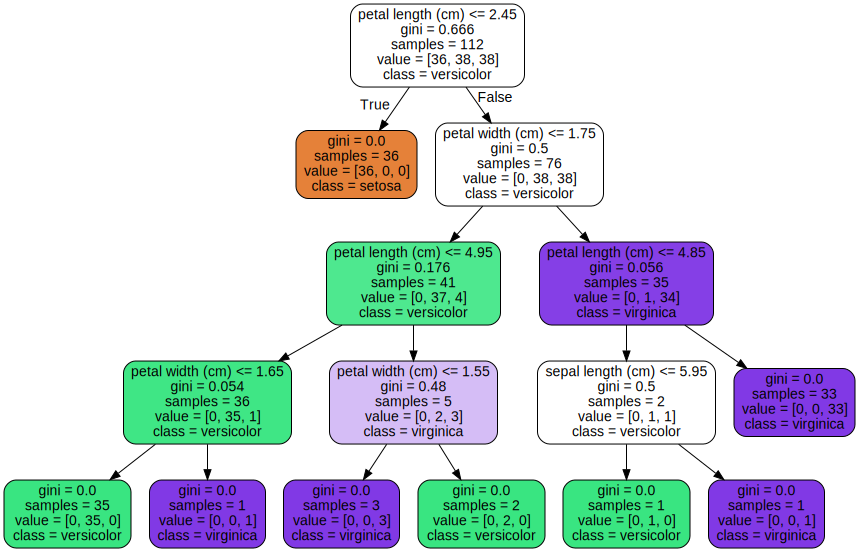

In [10]:
import graphviz
from sklearn import tree
# 导出数据
dot_data = tree.export_graphviz(model,feature_names=iris.feature_names,
                     class_names=iris['target_names'],# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph

#### 决策树剪枝

真实类别是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 2 2 1 2 0
 0]
算法预测是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 2 2 1 2 0
 0]
准确率是： 1.0


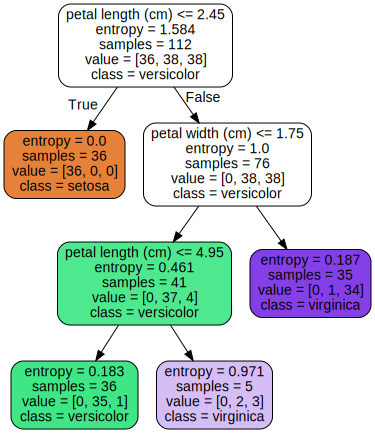

In [16]:
# max_depth默认，深度最大，延伸到将数据完全划分开为止。剪枝操作
# min_impurity_decrease（节点划分最小不纯度）如果某节点的不纯度(基尼系数，信息增益，均方差)小于这个阈值，
# 则该节点不再生成子节点
# min_samples_split（内部节点再划分所需最小样本数）
# min_samples_leaf（叶子节点最少样本数）
# max_leaf_nodes（最大叶子节点数）

model = DecisionTreeClassifier(criterion='entropy',min_samples_split=37)
model.fit(X_train,y_train)
y_ = model.predict(X_test)
print('真实类别是：',y_test)
print('算法预测是：',y_)
print('准确率是：',model.score(X_test,y_test))
# 导出数据
dot_data = tree.export_graphviz(model,feature_names=iris.feature_names,
                     class_names=iris['target_names'],# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph

#### 选择合适的超参数

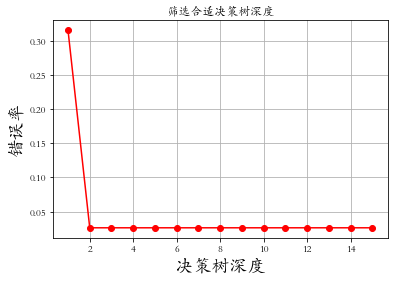

In [17]:
depth = np.arange(1,16)
err = []
for d in depth:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    err.append(1 - score)


plt.rcParams['font.family'] = 'STKaiti'
plt.plot(depth,err,'ro-')
plt.xlabel('决策树深度',fontsize = 18)
plt.ylabel('错误率',fontsize = 18)
plt.title('筛选合适决策树深度')
plt.grid()

#### 特征重要性

In [18]:
model.feature_importances_

array([0.        , 0.01126989, 0.06769757, 0.92103253])

In [20]:
model.fit(X_train[:,1:],y_train)

model.score(X_test[:,1:],y_test)

0.9736842105263158